In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('uber_data.csv')

In [4]:
data.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime) #coverting the strings into dates .. this step will take some time

In [6]:
data.tail()

Date/Time      Lat      Lon    Base
112311 2014-04-15 21:43:00  40.7554 -73.9837  B02598
112312 2014-04-15 21:43:00  40.6868 -73.9779  B02598
112313 2014-04-15 21:43:00  40.7963 -73.9735  B02598
112314 2014-04-15 21:43:00  40.7806 -73.9463  B02598
112315 2014-04-15 21:43:00  40.7184 -73.9893  B02598

In [10]:
def get_dom(full_dt):
    return full_dt.day

data['DOM'] = data['Date/Time'].map(get_dom)

In [12]:
data.tail()

Date/Time      Lat      Lon    Base  DOM
112311 2014-04-15 21:43:00  40.7554 -73.9837  B02598   15
112312 2014-04-15 21:43:00  40.6868 -73.9779  B02598   15
112313 2014-04-15 21:43:00  40.7963 -73.9735  B02598   15
112314 2014-04-15 21:43:00  40.7806 -73.9463  B02598   15
112315 2014-04-15 21:43:00  40.7184 -73.9893  B02598   15

In [20]:
def get_weekday(full_dt):
    return full_dt.weekday()

data['Weekday'] = data['Date/Time'].map(get_weekday)

In [21]:
data.tail()

Date/Time      Lat      Lon    Base  DOM  Weekday  Hour
112311 2014-04-15 21:43:00  40.7554 -73.9837  B02598   15        1    21
112312 2014-04-15 21:43:00  40.6868 -73.9779  B02598   15        1    21
112313 2014-04-15 21:43:00  40.7963 -73.9735  B02598   15        1    21
112314 2014-04-15 21:43:00  40.7806 -73.9463  B02598   15        1    21
112315 2014-04-15 21:43:00  40.7184 -73.9893  B02598   15        1    21

In [18]:
def get_hour(full_dt):
    return full_dt.hour

data['Hour'] = data['Date/Time'].map(get_hour)

In [25]:
data[data['DOM'] > 15]

Date/Time      Lat      Lon    Base  DOM  Weekday  Hour
18102 2014-04-16 00:00:00  40.7592 -73.9730  B02512   16        2     0
18103 2014-04-16 00:01:00  40.7600 -73.9810  B02512   16        2     0
18104 2014-04-16 00:13:00  40.7325 -74.0019  B02512   16        2     0
18105 2014-04-16 00:13:00  40.7274 -73.9921  B02512   16        2     0
18106 2014-04-16 00:19:00  40.7189 -74.0342  B02512   16        2     0
...                   ...      ...      ...     ...  ...      ...   ...
35531 2014-04-30 23:40:00  40.7672 -73.9702  B02512   30        2    23
35532 2014-04-30 23:44:00  40.7270 -73.9803  B02512   30        2    23
35533 2014-04-30 23:47:00  40.6906 -73.9582  B02512   30        2    23
35534 2014-04-30 23:47:00  40.7737 -73.8717  B02512   30        2    23
35535 2014-04-30 23:59:00  40.8660 -73.9278  B02512   30        2    23

[17434 rows x 7 columns]

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'frequecy')

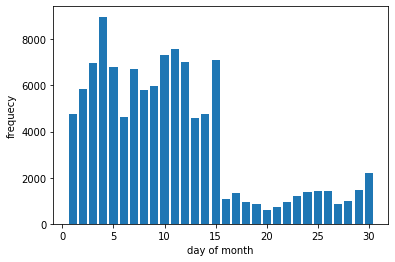

In [28]:
%pylab inline

hist(data['DOM'],bins=30, rwidth=0.8,range=(0.5,30.5))
xlabel('day of month')
ylabel('frequecy')

In [29]:
def count_groups(rows):
    return len(rows)

by_data = data.groupby('DOM').apply(count_groups)
by_data

DOM
1     4749
2     5862
3     6981
4     8978
5     6817
6     4648
7     6712
8     5804
9     5979
10    7335
11    7575
12    6995
13    4586
14    4743
15    7118
16    1059
17    1343
18     953
19     851
20     615
21     744
22     959
23    1196
24    1394
25    1410
26    1418
27     848
28     971
29    1487
30    2186
dtype: int64

In [32]:
# cross analysis 
data

Date/Time      Lat      Lon    Base  DOM  Weekday  Hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
112311 2014-04-15 21:43:00  40.7554 -73.9837  B02598   15        1    21
112312 2014-04-15 21:43:00  40.6868 -73.9779  B02598   15        1    21
112313 2014-04-15 21:43:00  40.7963 -73.9735  B02598   15        1    21
112314 2014-04-15 21:43:00  40.7806 -73.9463  B02598   15        1    21
112315 2014-04-15 21:43:00  40.7184 -73.9893  B02598   15        1    21

[112316 rows x 7 columns]

In [40]:
by_we_hr = data.groupby('Weekday Hour'.split(' ')).apply(count_groups).unstack()

In [41]:
by_we_hr

Hour       0    1    2    3    4    5    6     7     8    9   ...    14    15  \
Weekday                                                       ...               
0          92   39   46  105  178  324  623   816   627  451  ...   676   841   
1         152   66   63  115  174  385  789  1152  1064  680  ...  1010  1264   
2         127   71   56   85  166  290  720   942   795  588  ...   829  1103   
3         144   77   54  109  152  285  634   815   716  535  ...   837  1090   
4         220  145   90  142  177  244  651   833   715  530  ...   913  1118   
5         564  375  225  158  130  139  177   215   257  349  ...   641   955   
6        1070  639  311  207  152  120  143   177   263  390  ...   643   715   

Hour       16    17    18    19    20    21    22    23  
Weekday                                                  
0        1106  1244  1154  1081   777   667   405   205  
1        1681  1878  1580  1496  1520  1282   526   262  
2        1288  1488  1215  1100  1023   960   637   322  
3        1316  1433  1337  1128  1272  1310  1034   552  
4        1317  1517  1577  1389  1091  1274  1337  1031  
5        1146  1144  1354  1159  1058  1248  1469  1311  
6         715   668   559   527   431   448   305   197  

[7 rows x 24 columns]

In [39]:
import seaborn as sns

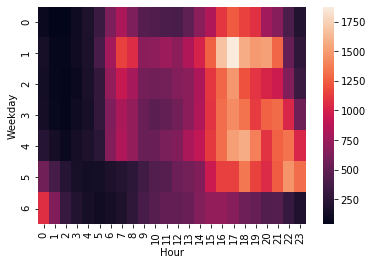

In [42]:
sns.heatmap(by_we_hr)

(array([0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        5.000e+00, 1.000e+00, 4.000e+00, 2.000e+01, 1.200e+01, 1.700e+01,
        1.300e+01, 3.400e+01, 3.100e+01, 3.400e+01, 6.300e+01, 6.900e+01,
        7.700e+01, 7.100e+01, 9.400e+01, 9.700e+01, 9.300e+02, 1.307e+03,
        1.500e+02, 1.980e+02, 2.990e+02, 4.440e+02, 6.860e+02, 9.700e+02,
        1.036e+03, 1.415e+03, 1.462e+03, 8.450e+02, 1.396e+03, 2.590e+03,
        2.956e+03, 5.348e+03, 7.719e+03, 6.522e+03, 6.171e+03, 6.514e+03,
        7.642e+03, 6.263e+03, 7.585e+03, 9.689e+03, 9.358e+03, 5.546e+03,
        5.434e+03, 3.734e+03, 2.311e+03, 1.397e+03, 7.320e+02, 4.350e+02,
        3.580e+02, 3.830e+02, 1.590e+02, 1.350e+02, 1.100e+02, 1.560e+02,
        9.000e+01, 7.600e+01, 9.300e+01, 6.300e+01, 1.260e+02, 8.200e+01,
        6.300e+01, 5.700e+01, 4.000e+01, 3.700e+01, 4.500e+01, 4.800e+01,
        7.600e+01, 3.800e+01, 1.600e+0

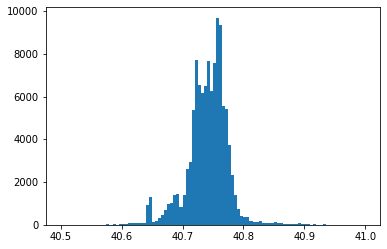

In [48]:
    hist(data.Lat,bins=100,range = (40.5 , 41))

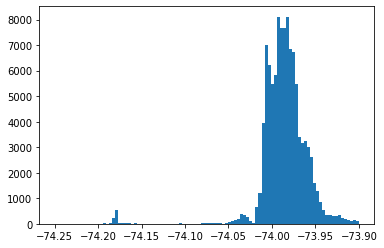

In [53]:
    hist(data.Lon,bins=100 , range = (-74.25 , -73.9));

''

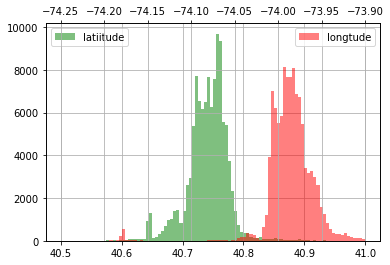

In [62]:
hist(data.Lat,bins=100,range = (40.5 , 41) , color='g' , alpha = 0.5 , label = "latiitude")
grid()
legend(loc='upper left')
twiny()
hist(data.Lon,bins=100 , range = (-74.25 , -73.9), color='r' , alpha = 0.5,label= "longtude")
grid()
legend(loc='upper right')

;